In [2]:
# Install necessary packages if not installed
# !pip install pandas numpy statsmodels seaborn

# Import libararies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=['Month'], index_col='Month')

In [4]:
df

,MilesMM
Month,
1963-01-01,6827
1963-02-01,6178
1963-03-01,7084
1963-04-01,8162
1963-05-01,8462
...,...
1970-08-01,14057
1970-09-01,16234
1970-10-01,12389


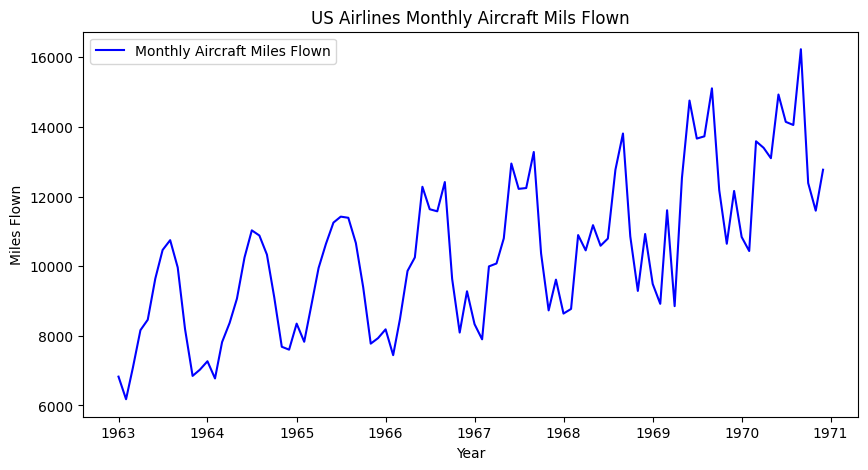

In [5]:
# Plot the time series data
plt.figure(figsize=(10,5))
plt.plot(df, label='Monthly Aircraft Miles Flown', color='blue')
plt.xlabel('Year')
plt.ylabel('Miles Flown')
plt.title('US Airlines Monthly Aircraft Mils Flown')
plt.legend()
plt.show()

In [6]:
# Check for stationarity using ADF Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

        
adf_test(df['MilesMM'])

ADF Statistic: 1.0229489778119778
p-value: 0.9945022811234028
Data is not stationary


In [7]:
# Differencing to remove trend and seasonality
df['MilesMM_diff'] = df['MilesMM'].diff().dropna()
df['MilesMM_seasonal_diff'] = df['MilesMM'].diff(12).dropna()

In [8]:
df['MilesMM_diff'].isnull().sum()

1

In [9]:
# Check again after stationary
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

        
adf_test(df['MilesMM_diff'])

MissingDataError: exog contains inf or nans

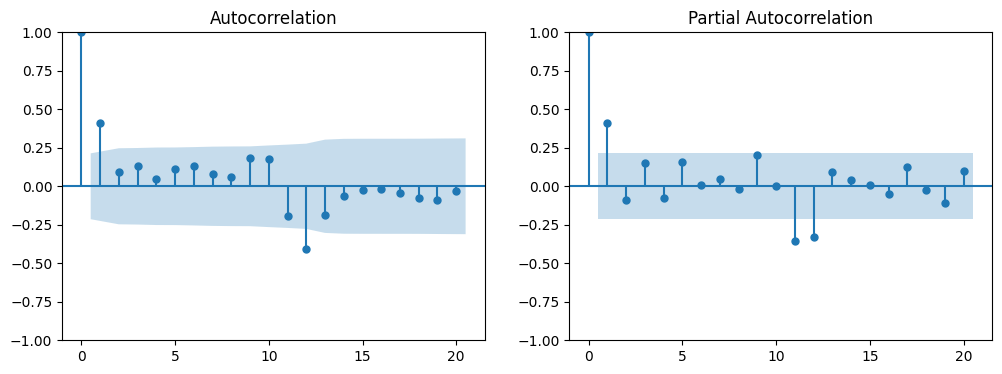

In [11]:
# Plot ACF and PACF to identify parameters
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['MilesMM_seasonal_diff'].dropna(), ax=axes[0])
plot_pacf(df['MilesMM_seasonal_diff'].dropna(), ax=axes[1])
plt.show()

In [12]:
# //# Explanation of the about plot

# p, d, q

# p = 1
# d = differencing 1

# (p, d, q)
# [ar (pacf), differencing, ma model (acf)]

In [13]:
# Define SARIMA Model (SARIMA(p,d,q))

p,d,q=1,1,1
P,D,Q,m=1,1,1,12

In [14]:
# Fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(df['MilesMM'],
                                        order=(p, d, q),
                                        seasonal_order=(P, D, Q, m),
                                        enforce_stationarity=False,
                                         enforce_invertibility=False)

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
# 1. to do in phone

In [16]:
sarima_result = sarima_model.fit()

In [17]:
# Model summary
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            MilesMM   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -559.576
Date:                            Wed, 02 Apr 2025   AIC                           1129.151
Time:                                    15:06:26   BIC                           1140.322
Sample:                                01-01-1963   HQIC                          1133.583
                                     - 12-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0870      0.161      0.540      0.589      -0.229       0.403
ma.L1         -0.7840      0.121   

In [18]:
# Forecasting for next 24 months
future_steps = 24
forecast = sarima_result.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='M')[1:]
forecast_index

C:\Users\Acer\AppData\Local\Temp\ipykernel_14992\1156948135.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='M')[1:]


DatetimeIndex(['1971-01-31', '1971-02-28', '1971-03-31', '1971-04-30',
               '1971-05-31', '1971-06-30', '1971-07-31', '1971-08-31',
               '1971-09-30', '1971-10-31', '1971-11-30', '1971-12-31',
               '1972-01-31', '1972-02-29', '1972-03-31', '1972-04-30',
               '1972-05-31', '1972-06-30', '1972-07-31', '1972-08-31',
               '1972-09-30', '1972-10-31', '1972-11-30', '1972-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [19]:
# Confidence interval
forecast_ci = forecast.conf_int()
forecast_ci

,lower MilesMM,upper MilesMM
1971-01-01,10032.925459,13165.431606
1971-02-01,9552.795487,12825.937905
1971-03-01,12226.361538,15586.401237
1971-04-01,10715.604148,14156.746240
1971-05-01,12545.863428,16065.937059
1971-06-01,14216.862274,17814.110183
1971-07-01,13381.504237,17054.302974
1971-08-01,13613.377799,17360.204083
1971-09-01,15139.349287,18958.768578
1971-10-01,11889.844538,15780.502610


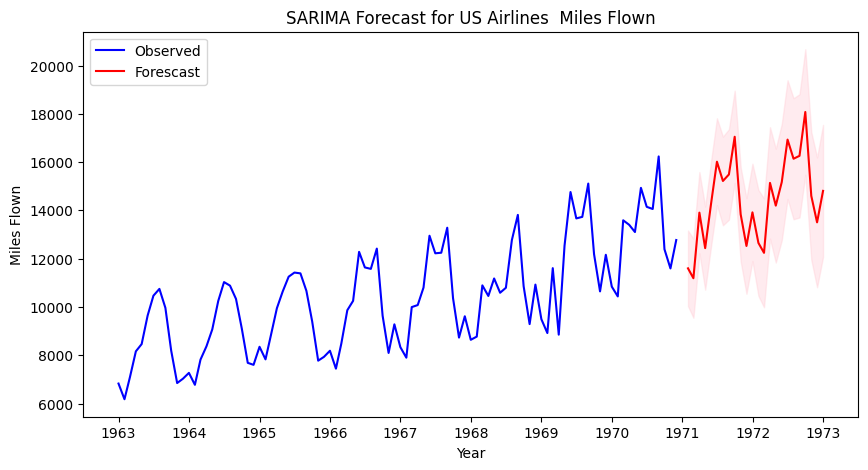

In [22]:
# Plot the forecast 
plt.figure(figsize=(10,5))
plt.plot(df.index, df['MilesMM'], label='Observed', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='Forescast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],color='pink',alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Miles Flown')
plt.title('SARIMA Forecast for US Airlines  Miles Flown')
plt.legend()
plt.show()

# to do

In [23]:
# after log
# adf test
# p values

In [24]:
# stationary means no trend, no seasonality

In [ ]:
# log transformation
# ---------------------------

# log use kiya and -> stationary -> predict -> e^x (means inverse log) -> predict -> rf